# Pendahuluan

Di dalam material ini, kamu akan mempelajari Data Heart Disease dan belajar bagaimana dilakukan elaborasi. Lakukan kode dan jalankan setiap sel. Selama proses pembelajaran, kamu akan menemui beberapa blok **TODO** -- ikuti petunjuk untuk mengisinya sebelum menjalankan sel-sel tersebut dan melanjutkan.

## Introduction to Capstone Project

Cardiovascular disease (CVDs) atau penyakit jantung merupakan penyebab kematian nomor satu secara global dengan 17,9 juta kasus kematian setiap tahunnya. Penyakit jantung disebabkan oleh hipertensi, obesitas, dan gaya hidup yang tidak sehat. Deteksi dini penyakit jantung perlu dilakukan pada kelompok risiko tinggi agar dapat segera mendapatkan penanganan dan pencegahan. Sehingga tujuan bisnis yang ingin dicapai yaitu membentuk model prediksi penyakit jantung pada pasien berdasarkan feature-feature yang ada untuk membantu para dokter melakukan diagnosa secara tepat dan akurat. Harapannya agar penyakit jantung dapat ditangani lebih awal. Dengan demikian, diharapkan juga angka kematian akibat penyakit jantung dapat turun.

**Problem Statement**

Masalah yang ingin kita selesaikan adalah melakukan diagnosa pasien penderita penyakit jantung secara tepat dan akurat. Perlu dilakukan analisis faktor-faktor penyebab dan gejala penyakit jantung pada pasien.

**About Datasets**

Dataset yang digunakan adalah data Heart Disease yang diunduh dari UCI ML: https://archive.ics.uci.edu/dataset/45/heart+disease

Dataset yang digunakan ini berasal dari tahun 1988 dan terdiri dari empat database: Cleveland, Hungaria, Swiss, dan Long Beach V. Bidang "target" mengacu pada adanya penyakit jantung pada pasien. Ini adalah bilangan bulat bernilai 0 = tidak ada penyakit dan 1 = penyakit.

Dataset heart disease terdiri dari 1025 baris data dan 13 atribut + 1 target. Dataset ini memiliki 14 kolom yaitu:

1. age: variabel ini merepresentasikan usia pasien yang diukur dalam tahun.
2. sex: variabel ini merepresentasikan jenis kelamin pasien dengan nilai 1 untuk laki-laki dan nilai 0 untuk perempuan.
3. cp (Chest pain type): variabel ini merepresentasikan jenis nyeri dada yang dirasakan oleh pasien dengan 4 nilai kategori yang mungkin: nilai 1 mengindikasikan nyeri dada tipe angina, nilai 2 mengindikasikan nyeri dada tipe nyeri tidak stabil, nilai 3 mengindikasikan nyeri dada tipe nyeri tidak stabil yang parah, dan nilai 4 mengindikasikan nyeri dada yang tidak terkait dengan masalah jantung.
4. trestbps (Resting blood pressure): variabel ini merepresentasikan tekanan darah pasien pada saat istirahat, diukur dalam mmHg (milimeter air raksa (merkuri)).
5. chol (Serum cholestoral): variabel ini merepresentasikan kadar kolesterol serum dalam darah pasien, diukur dalam mg/dl (miligram per desiliter).
6. fbs (Fasting blood sugar): variabel ini merepresentasikan kadar gula darah pasien saat puasa (belum makan) dengan nilai 1 jika kadar gula darah > 120 mg/dl dan nilai 0 jika tidak.
7. restecg (Resting electrocardiographic results): variabel ini merepresentasikan hasil elektrokardiogram pasien saat istirahat dengan 3 nilai kategori yang mungkin: nilai 0 mengindikasikan hasil normal, nilai 1 mengindikasikan adanya kelainan gelombang ST-T, dan nilai 2 mengindikasikan hipertrofi ventrikel kiri.
8. thalach (Maximum heart rate achieved): variabel ini merepresentasikan detak jantung maksimum yang dicapai oleh pasien selama tes olahraga, diukur dalam bpm (denyut per menit).
9. exang (Exercise induced angina): variabel ini merepresentasikan apakah pasien mengalami angina (nyeri dada) yang dipicu oleh aktivitas olahraga, dengan nilai 1 jika ya dan nilai 0 jika tidak.
10. oldpeak: variabel ini merepresentasikan seberapa banyak ST segmen menurun atau depresi saat melakukan aktivitas fisik dibandingkan saat istirahat.
11. slope: variabel ini merepresentasikan kemiringan segmen ST pada elektrokardiogram (EKG) selama latihan fisik maksimal dengan 3 nilai kategori.
12. ca (Number of major vessels): variabel ini merepresentasikan jumlah pembuluh darah utama (0-3) yang terlihat pada pemeriksaan flourosopi.
13. thal: variabel ini merepresentasikan hasil tes thalium scan dengan 3 nilai kategori yang mungkin:
 - thal 1: menunjukkan kondisi normal.
 - thal 2: menunjukkan adanya defek tetap pada thalassemia.
 - thal 3: menunjukkan adanya defek yang dapat dipulihkan pada thalassemia.
14. target: 0 = tidak ada penyakit dan 1 = penyakit.

**Objective of Capstone 1**

Tujuan dari Capstone adalah melakukan data preprocessing termasuk Exploratory Data Analysis untuk menggali insight dari data pasien penderita penyakit jantung hingga proses feature selection dan dimensionality reduction. Hasil akhir yang ingin dicapai yaitu mendapatkan insight data penderita penyakit jantung dan data yang siap untuk dimodelkan pada tahap selanjutnya.

**Metrics**

Tahap untuk mendukung dalam menyelesaikan problem statement yang ada dan akan digunakan untuk memantau kinerja solusi. Berikut metrics yang termasuk :
1. Jumlah Penderita penyakit jantung
2. Proporsi pasien pria dan wanita yang mengalami penyakit jantung
3. Usia rata rata pasien yang terkena penyakit jantung
4. Korelasi penyakit jantung terhadap tiap variabel yang ada pada dataset (kolestrol, tekanan darah, jenis kelamin, kadar gula darah, detak jantung maksumun selama tes latihan, dan variabel lainnya)

**Persiapan**

Disini kita akan menyiapkan libraries yang diperlukan dan dataset berdasarkan link: https://storage.googleapis.com/dqlab-dataset/heart_disease.csv. Dalam rangka mengetahui tentang dataset, kita akan melihat overview.

##Section1

In [129]:
#Import libraries
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
from scipy.stats import pearsonr, jarque_bera
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [130]:
# Memuat dataset Heart Disease UCI ML
url = "https://storage.googleapis.com/dqlab-dataset/heart_disease.csv"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=column_names, skiprows=[0])

# Menampilkan lima baris teratas
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [131]:
# Menampilkan lima baris terbawah
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [132]:
# Melihat jumlah dataset (jumlah baris dan kolom)
data.shape

(1025, 14)

In [133]:
# Melihat columns apa saja yang ada dalam dataset
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [134]:
# Melihat persebaran data untuk data numerik
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [135]:
# Melihat uniqueness data
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [136]:
# Melihat informasi dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Data Quality**

Disini kita akan melakukan pengecekan karakter, handling missing value, outlier, duplikat dan data imbalance serta skewness.

In [137]:
'''TODO: Memilih mana data yang kategorikal dan ubah menjadi object'''
# Melakukan handling kolom menjadi kategorikal
lst=['sex','cp','fbs','restecg','exang','slope','thal','ca','target']
data[lst] = data[lst].astype(object)

# Melihat perubahan
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [138]:
# Pelabelan data categorical
data['sex'] = data['sex'].replace({1: 'Male',
                                   0: 'Female'})
data['cp'] = data['cp'].replace({0: 'typical angina',
                                 1: 'atypical angina',
                                 2: 'non-anginal pain',
                                 3: 'asymtomatic'})
data['fbs'] = data['fbs'].replace({0: 'No',
                                   1: 'Yes'})
data['restecg'] = data['restecg'].replace({0: 'probable or definite left ventricular hypertrophy',
                                           1:'normal',
                                           2: 'ST-T Wave abnormal'})
data['exang'] = data['exang'].replace({0: 'No',
                                       1: 'Yes'})
data['slope'] = data['slope'].replace({0: 'downsloping',
                                       1: 'flat',
                                       2: 'upsloping'})
data['thal'] = data['thal'].replace({1: 'normal',
                                     2: 'fixed defect',
                                     3: 'reversable defect'})
data['ca'] = data['ca'].replace({0: 'Number of major vessels: 0',
                                 1: 'Number of major vessels: 1',
                                 2: 'Number of major vessels: 2',
                                 3: 'Number of major vessels: 3'})
data['target'] = data['target'].replace({0: 'No disease',
                                         1: 'Disease'})

In [139]:
'''TODO: Memisahkan data numerical dengan categorical'''
# Pisahkan numerical dan categorical
numerical_col = data.select_dtypes(exclude='object')
categorical_col = data.select_dtypes(exclude=['int64','float64'])

In [140]:
# Pengecekan karakter dari data kategorikal
for i in categorical_col:
    print("Berikut ini merupakan informasi: {} dengan {}".format(i, data[i].unique()))
    print()

Berikut ini merupakan informasi: sex dengan ['Male' 'Female']

Berikut ini merupakan informasi: cp dengan ['typical angina' 'atypical angina' 'non-anginal pain' 'asymtomatic']

Berikut ini merupakan informasi: fbs dengan ['No' 'Yes']

Berikut ini merupakan informasi: restecg dengan ['normal' 'probable or definite left ventricular hypertrophy'
 'ST-T Wave abnormal']

Berikut ini merupakan informasi: exang dengan ['No' 'Yes']

Berikut ini merupakan informasi: slope dengan ['upsloping' 'downsloping' 'flat']

Berikut ini merupakan informasi: ca dengan ['Number of major vessels: 2' 'Number of major vessels: 0'
 'Number of major vessels: 1' 'Number of major vessels: 3' 4]

Berikut ini merupakan informasi: thal dengan ['reversable defect' 'fixed defect' 'normal' 0]

Berikut ini merupakan informasi: target dengan ['No disease' 'Disease']



Terdapat dua feature yang mengalami kesalahan penulisan:
1. Feature 'CA': Memiliki 5 nilai dari rentang 0-4, maka dari itu nilai 4 diubah menjadi NaN (karena seharusnya tidak ada)
2. Feature 'thal': Memiliki 4 nilai dari rentang 0-3, maka dari itu nulai 0 diubah menjadi NaN (karena seharusnya tidak ada)

In [141]:
'''TODO: Menampilkan jumlah data per item'''
# Melihat jumlah nilai unik dari kolom 'ca'
data['ca'].value_counts()

ca
Number of major vessels: 0    578
Number of major vessels: 1    226
Number of major vessels: 2    134
Number of major vessels: 3     69
4                              18
Name: count, dtype: int64

Bahwa ada data di kolom 'ca' yang bernilai '4' sebanyak 18. Padahal nilai '4' harusnya tidak ada.

In [142]:
# Menemukan baris dengan kolom 'ca' bernilai '4'
data[data['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
83,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
128,52,Male,non-anginal pain,138,223,No,normal,169,No,0.0,upsloping,4,fixed defect,Disease
208,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
242,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
290,52,Male,non-anginal pain,138,223,No,normal,169,No,0.0,upsloping,4,fixed defect,Disease
340,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
348,43,Male,typical angina,132,247,Yes,probable or definite left ventricular hypertrophy,143,Yes,0.1,flat,4,reversable defect,No disease
417,52,Male,non-anginal pain,138,223,No,normal,169,No,0.0,upsloping,4,fixed defect,Disease
428,43,Male,typical angina,132,247,Yes,probable or definite left ventricular hypertrophy,143,Yes,0.1,flat,4,reversable defect,No disease


##Section 2

In [143]:
'''TODO: Ubah menjadi NaN'''
# Ganti kolom 'ca' yang bernilai '4' menjadi NaN
data.loc[data['ca']==4, 'ca'] = np.nan

In [144]:
# Cek kembali apakah masih ada data kolom 'ca' yang bernilai '4'
data['ca'].value_counts()

ca
Number of major vessels: 0    578
Number of major vessels: 1    226
Number of major vessels: 2    134
Number of major vessels: 3     69
Name: count, dtype: int64

In [145]:
# Melihat jumlah nilai unik dari kolom 'thal'
data['thal'].value_counts()

thal
fixed defect         544
reversable defect    410
normal                64
0                      7
Name: count, dtype: int64

Bahwa ada data di kolom 'thal' yang bernilai '0' sebanyak 7. Padahal nilai '0' harusnya tidak ada.

In [146]:
# Menemukan baris dengan kolom 'thal' bernilai '0'
data[data['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,Male,typical angina,128,204,Yes,normal,156,Yes,1.0,flat,Number of major vessels: 0,0,No disease
319,53,Female,non-anginal pain,128,216,No,probable or definite left ventricular hypertrophy,115,No,0.0,upsloping,Number of major vessels: 0,0,Disease
329,53,Female,non-anginal pain,128,216,No,probable or definite left ventricular hypertrophy,115,No,0.0,upsloping,Number of major vessels: 0,0,Disease
359,53,Female,non-anginal pain,128,216,No,probable or definite left ventricular hypertrophy,115,No,0.0,upsloping,Number of major vessels: 0,0,Disease
686,52,Male,typical angina,128,204,Yes,normal,156,Yes,1.0,flat,Number of major vessels: 0,0,No disease
734,52,Male,typical angina,128,204,Yes,normal,156,Yes,1.0,flat,Number of major vessels: 0,0,No disease
893,52,Male,typical angina,128,204,Yes,normal,156,Yes,1.0,flat,Number of major vessels: 0,0,No disease


In [147]:
# Ganti kolom 'thal' yang bernilai '0' menjadi NaN
data.loc[data['thal']==0, 'thal'] = np.nan

In [148]:
# Cek kembali apakah masih ada data kolom 'thal' yang bernilai '0'
data['thal'].value_counts()

thal
fixed defect         544
reversable defect    410
normal                64
Name: count, dtype: int64

Selanjutnya kita akan handling missing value.

In [149]:
# Check missing values
print("Hasil missing value:\n", data.isnull().sum())

Hasil missing value:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca          18
thal         7
target       0
dtype: int64


In [150]:
'''TODO: Mengisi dengan modus'''
# Fillna pada kolom 'ca' dengan modus
modus_ca = data['ca'].mode()[0]
data['ca'] = data['ca'].fillna(modus_ca)

In [151]:
# Fillna pada kolom 'thal' dengan modus
modus_thal = data['thal'].mode()[0]
data['thal'] = data['thal'].fillna(modus_thal)

In [152]:
'''TODO: Menampilkan missing value'''
# Check missing values kembali
print("Hasil missing value:\n", data.isnull().sum())

Hasil missing value:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Kita akan melakukan pengecekan rows yang duplikat.

In [153]:
'''TODO: Menampilkan data duplikat ada berapa'''
# Memeriksa duplikat data
data.duplicated().sum()

723

In [154]:
# Menampilkan baris data duplicate
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,Female,atypical angina,118,210,No,normal,192,No,0.7,upsloping,Number of major vessels: 0,fixed defect,Disease
31,50,Female,atypical angina,120,244,No,normal,162,No,1.1,upsloping,Number of major vessels: 0,fixed defect,Disease
43,46,Male,typical angina,120,249,No,probable or definite left ventricular hypertrophy,144,No,0.8,upsloping,Number of major vessels: 0,reversable defect,No disease
55,55,Male,typical angina,140,217,No,normal,111,Yes,5.6,downsloping,Number of major vessels: 0,reversable defect,No disease
61,66,Female,non-anginal pain,146,278,No,probable or definite left ventricular hypertrophy,152,No,0.0,flat,Number of major vessels: 1,fixed defect,Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,atypical angina,140,221,No,normal,164,Yes,0.0,upsloping,Number of major vessels: 0,fixed defect,Disease
1021,60,Male,typical angina,125,258,No,probable or definite left ventricular hypertrophy,141,Yes,2.8,flat,Number of major vessels: 1,reversable defect,No disease
1022,47,Male,typical angina,110,275,No,probable or definite left ventricular hypertrophy,118,Yes,1.0,flat,Number of major vessels: 1,fixed defect,No disease
1023,50,Female,typical angina,110,254,No,probable or definite left ventricular hypertrophy,159,No,0.0,upsloping,Number of major vessels: 0,fixed defect,Disease


Berdasarkan output diatas, kamu perlu melakukan drop duplikat data agar tidak ada data yang duplikat dalam dataset.

In [155]:
'''TODO: Menghapus data duplikat dan mempertahankan data pertama'''
# Menghapus data duplikat
data.drop_duplicates(keep='first',inplace=True)

# Memeriksa ulang duplikat data
data.duplicated().sum()

0

##Section 3

Selanjutnya kita akan menampilkan outliers dan menghapus data yang outlier.

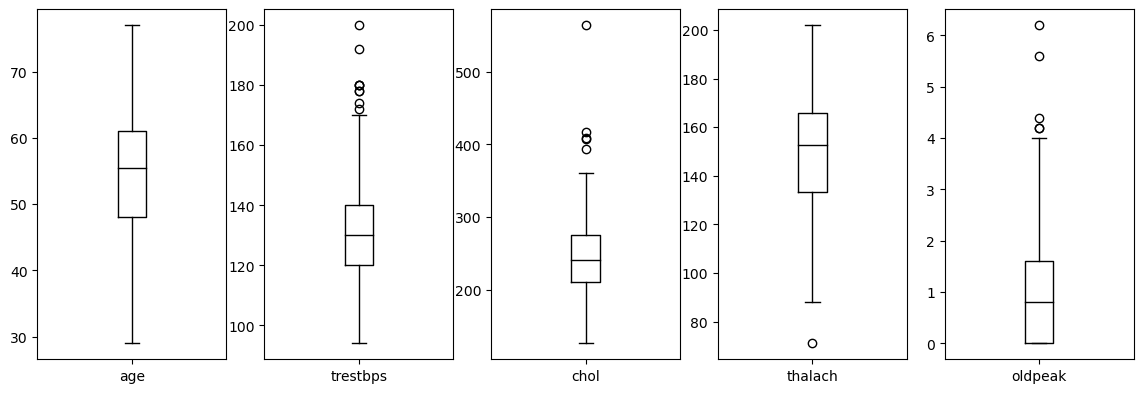

In [156]:
#Menampilkan boxplot untuk melihat outliers data numerik
data.plot(kind = 'box', subplots = True, layout = (2,7), sharex = False, sharey = False, figsize = (20, 10), color = 'k')
plt.show()

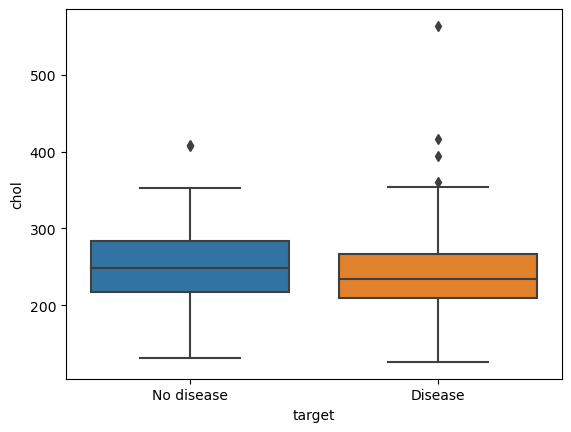

In [157]:
'''TODO: Menampilkan boxplot chol per target'''
# Menampilkan data berdasarkan target untuk feature chol
sns.boxplot(x=data['target'],y=data['chol'],data=data)
plt.show()

Data yang outliers terletak pada data non-categorical atau data continuous yaitu: 'age', 'trestbps', 'chol', 'thalach', dan 'oldpeak'

In [158]:
'''TODO: Menentukan data continous'''
#Mencari tahu data yang outliers dengan mendefinisikan fungsi
continous_features = ['age', 'chol', 'thalach', 'oldpeak']
def outliers(data_out, drop=False):
    for each_feature in data_out.columns:
        if each_feature in continous_features:  # Memeriksa apakah kolom adalah data kontinu
            feature_data = data_out[each_feature]
            Q1 = np.percentile(feature_data, 25.)
            Q3 = np.percentile(feature_data, 75.)
            IQR = Q3 - Q1
            outlier_step = IQR * 1.5
            outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
            if not drop:
                print('For the feature {}, Num of Outliers is {}'.format(each_feature, len(outliers)))
            if drop:
                data_out.drop(outliers, inplace=True, errors='ignore')
                print('Outliers from {} feature removed'.format(each_feature))
'''TODO: Menampilkan data yang outlier'''
outliers(data)

For the feature age, Num of Outliers is 0
For the feature chol, Num of Outliers is 5
For the feature thalach, Num of Outliers is 1
For the feature oldpeak, Num of Outliers is 5


In [159]:
'''TODO: Menghapus data yang outlier'''
# Menghapus outlier dengan fungsi sebelumnya
outliers(data,drop=True)

Outliers from age feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


Melihat informasi dari kategori dari data kategorikal.

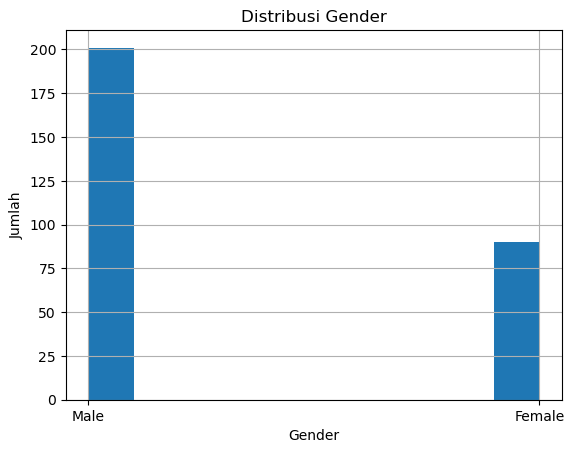

In [160]:
'''TODO: Buatlah histogram sex'''
# Jumlah kategori sex pada dataset
data['sex'].hist().plot(kind='bar')
#data['sex'].value_counts().plot(kind='bar')
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

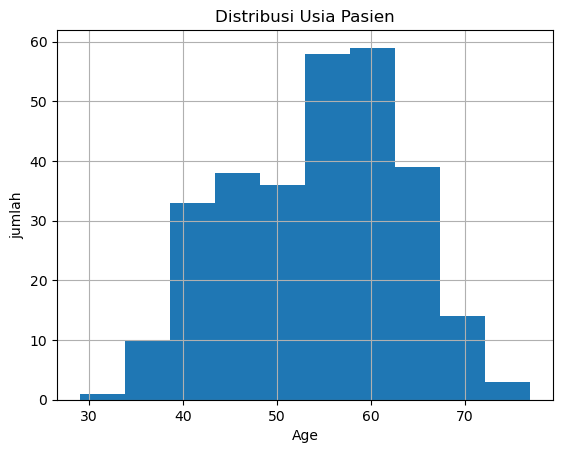

In [161]:
'''TODO: Buatlah histogram age'''
# Jumlah kategori age pada dataset
data['age'].hist().plot(kind='bar')
plt.title('Distribusi Usia Pasien')
plt.xlabel('Age')
plt.ylabel('jumlah')
plt.show()

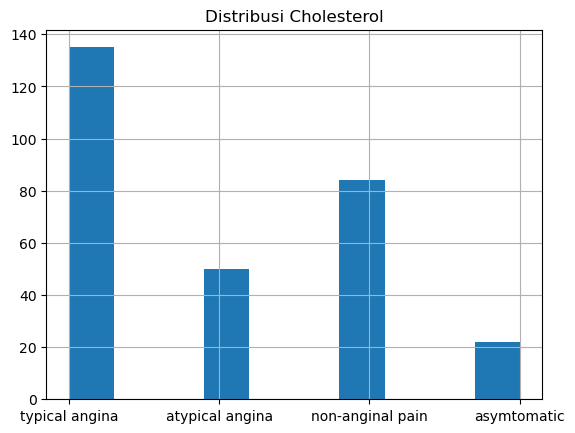

In [162]:
'''TODO: Buatlah histogram cp'''
# Jumlah kategori cp pada dataset
data['cp'].hist().plot(kind='bar')
plt.title('Distribusi Cholesterol')
plt.show()

Selanjutnya kita akan melakukan pengecekan data, apakah target imbalance?

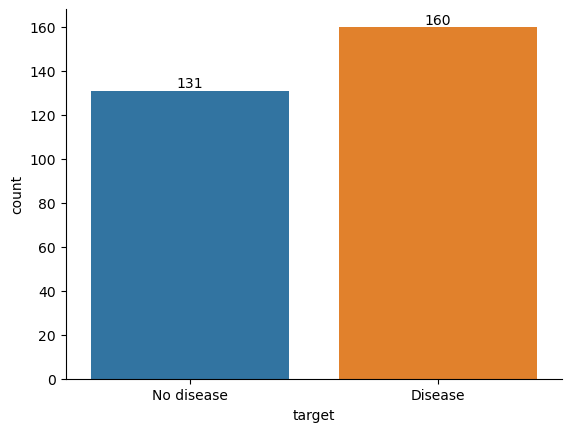

In [163]:
# Memeriksa data imbalance
ax = sns.countplot(x=data['target'],data=data)
for label in ax.containers:
    ax.bar_label(label)
sns.despine()
plt.show()

Dapat dilihat pada output diatas data cukup seimbang (balanced), karena tidak terdapat perbedaan yang signifikan dimana terdiagnosa **disease** adalah 55.8% (158 cases), dan lain halnya untuk **no disease** adalah kurang dari 45%.

**Periksa statistik deskriptif dari kumpulan data (rata-rata, distribusi, dll)**

In [164]:
# Melihat statistik deskriptif dari data
data.describe()

,age,trestbps,chol,thalach,oldpeak
count,291.000000,291.000000,291.000000,291.000000,291.000000
mean,54.192440,131.316151,243.120275,150.027491,0.961856
std,9.089824,17.471249,44.836823,22.670182,1.043348
min,29.000000,94.000000,126.000000,88.000000,0.000000
25%,47.000000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.600000
75%,60.500000,140.000000,273.000000,167.500000,1.600000
max,77.000000,200.000000,360.000000,202.000000,4.000000


Dari kumpulan data yang diberikan, dapat dilihat bahwa terdapat 302 entri dan 6 kolom. Berikut adalah statistik deskriptif dari setiap variabel:

1. age: umur pasien, dengan rata-rata (mean) 54.42 tahun dan rentang antara 29 hingga 77 tahun.
2. trestbps: tekanan darah saat istirahat (resting blood pressure) dalam mmHg, dengan rata-rata 131.6 dan rentang antara 94 hingga 200.
3. chol: serum kolesterol dalam mg/dl, dengan rata-rata 246.5 dan rentang antara 126 hingga 564.
4. thalach: detak jantung maksimal yang dicapai selama tes olahraga, dengan rata-rata 149.57 dan rentang antara 71 hingga 202.
5. oldpeak: depresi ST (ST depression) relatif terhadap istirahat yang diinduksi oleh olahraga, dengan rata-rata 1.043 dan rentang antara 0 hingga 6.2.
6. target: variabel target yang menunjukkan keberadaan atau tidaknya penyakit jantung, dengan nilai 0 menunjukkan tidak adanya penyakit dan nilai 1 menunjukkan adanya penyakit.

Selanjutnya kita melihat distribusi data countinous.

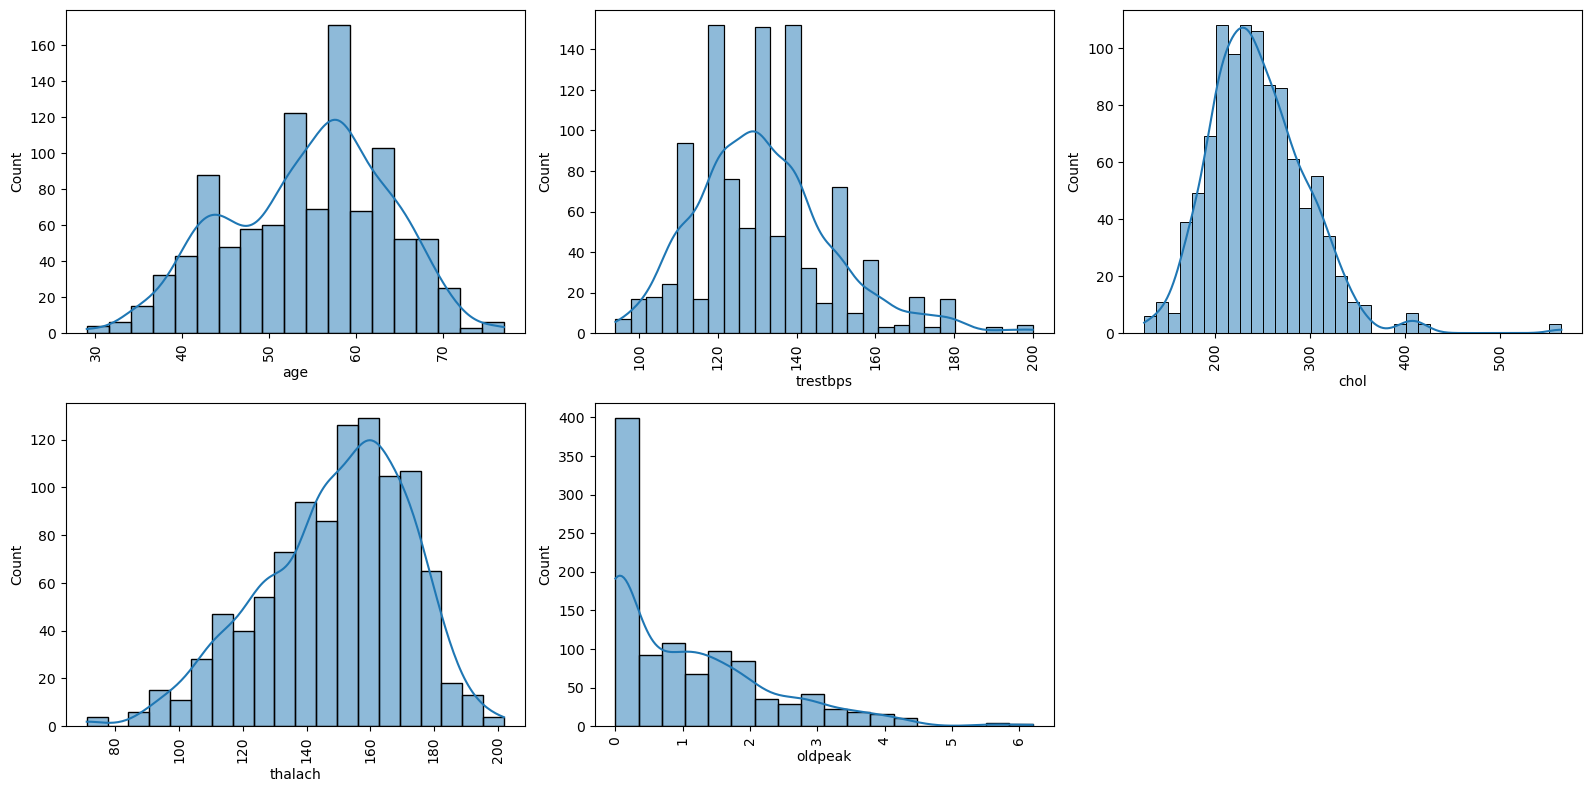

In [165]:
# Memvisualisasikan distribusi variabel numerical
plt.figure(figsize=(16,8))
for index,column in enumerate(numerical_col):
    plt.subplot(2,3,index+1)
    sns.histplot(data=numerical_col,x=column,kde=True)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

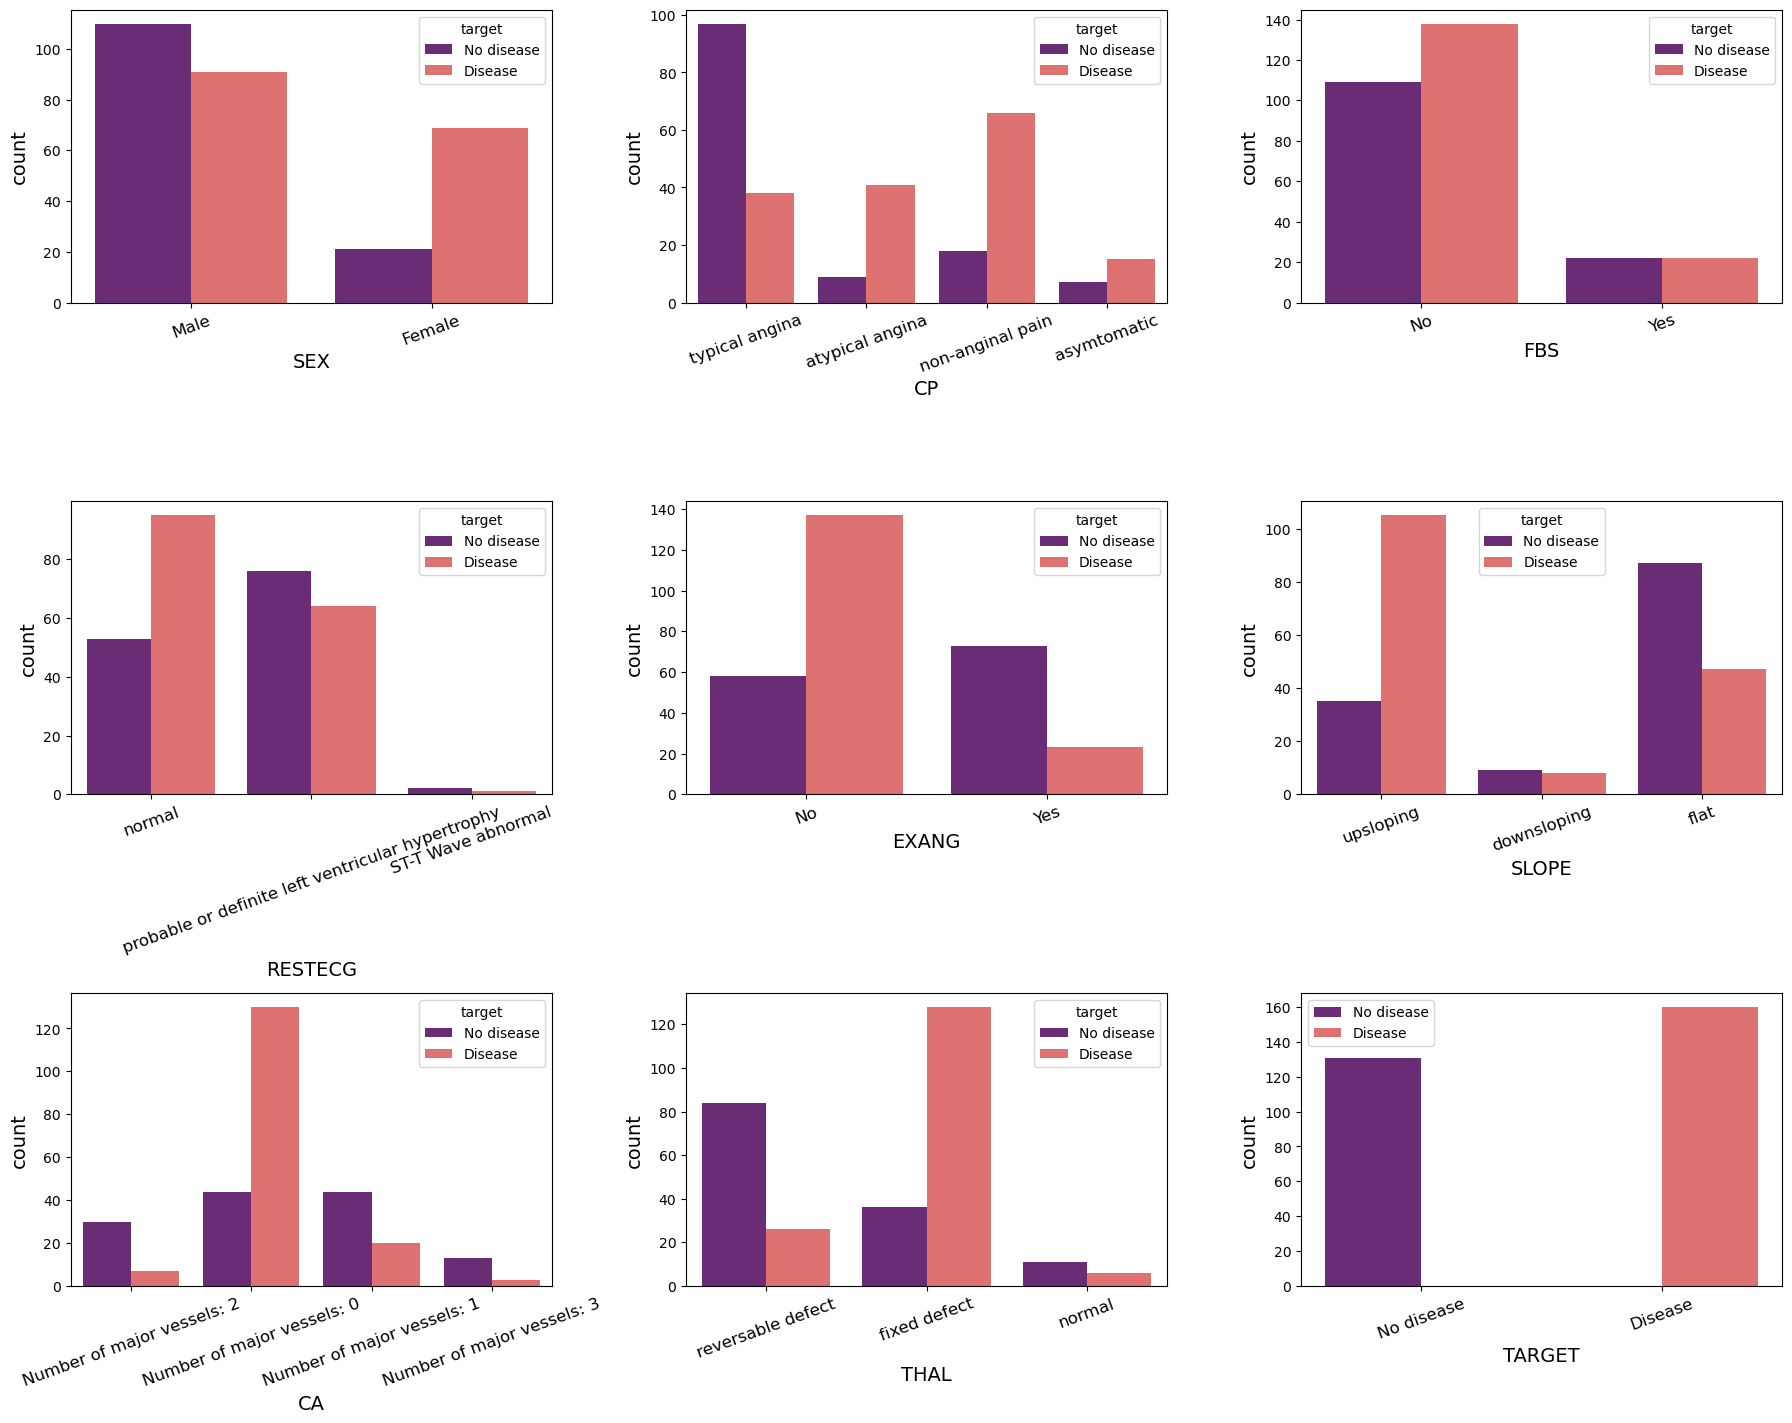

In [166]:
# Memvisualisasikan distribusi variabel kategorikal
categorical_col = data.select_dtypes(exclude=['int64','float64']) # reload categorical data
plt.figure(figsize=(18, 18))  # Increase the figure size
for index, column in enumerate(categorical_col):
    ax = plt.subplot(4, 3, index + 1)
    sns.countplot(data=categorical_col, x=column, hue='target', palette='magma')
    ax.set_xlabel(column.upper(), fontsize=14)
    ax.set_ylabel("count", fontsize=14)
    ax.tick_params(axis='x', labelrotation=20, labelsize=12)  # Rotate and set fontsize for x-axis labels

plt.tight_layout(pad=1.0)
plt.legend()
plt.subplots_adjust(bottom=0.01)  # Fine-tune the spacing
plt.show()

Melihat korelasi antar feature.

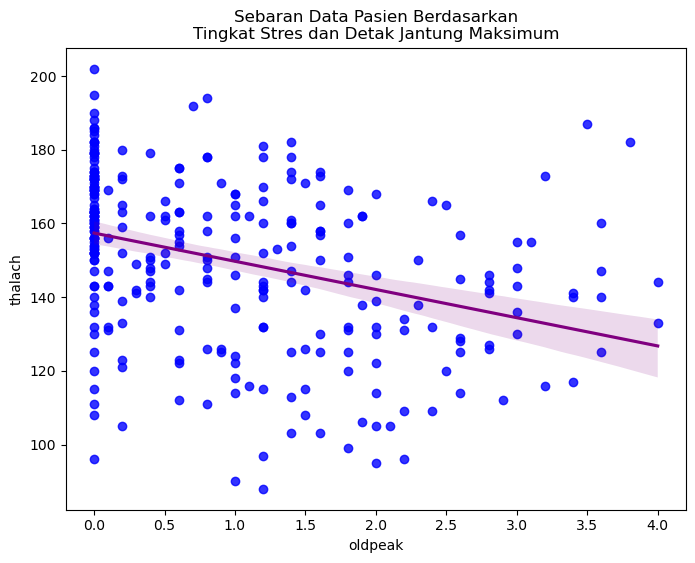

In [167]:
'''TODO: Menampilkan oldpeak dengan thalach'''
# melihat korelasi tingkat depresi dan detak jantung maksimum
plt.figure(figsize = (8,6))
sns.regplot(x=data['oldpeak'],y=data['thalach'], scatter_kws = {'color':'blue'}, line_kws = {'color':'purple'})
plt.title('Sebaran Data Pasien Berdasarkan\nTingkat Stres dan Detak Jantung Maksimum')
plt.show()

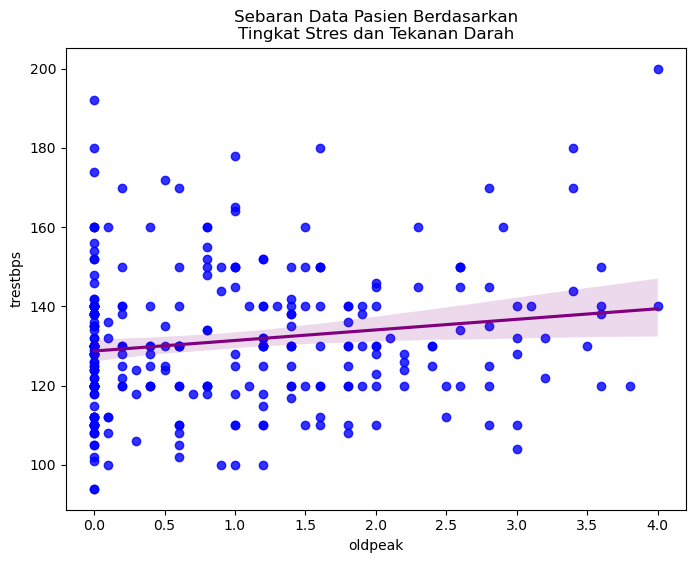

In [168]:
'''TODO: Menampilkan oldpeak dengan trestbps'''
# melihat korelasi tingkat depresi dan tekanan darah
plt.figure(figsize = (8,6))
sns.regplot(x=data['oldpeak'],y=data['trestbps'], scatter_kws = {'color':'blue'}, line_kws = {'color':'purple'})
plt.title('Sebaran Data Pasien Berdasarkan\nTingkat Stres dan Tekanan Darah')
plt.show()

Simpulkan dari grafik yang kamu dapatkan?

In [169]:
# Simpan data yang sudah ada label
data.to_csv('data.csv')

# Melabeli kembali datanya
df = pd.read_csv('data.csv', index_col=0)
df['sex'] = df['sex'].replace({'Male' : 1,'Female': 0})
df['cp'] = df['cp'].replace({'typical angina' : 0, 'atypical angina' : 1, 'non-anginal pain' : 2, 'asymtomatic' : 3})
df['fbs'] = df['fbs'].replace({'No' : 0, 'Yes' : 1})
df['restecg'] = df['restecg'].replace({'probable or definite left ventricular hypertrophy':0,'normal':1,'ST-T Wave abnormal':2})
df['exang'] = df['exang'].replace({'No':0,'Yes':1})
df['slope'] = df['slope'].replace({'downsloping':0, 'flat':1,'upsloping':2})
df['thal'] = df['thal'].replace({'normal':1, 'fixed defect':2,'reversable defect':3})
df['ca'] = df['ca'].replace({'Number of major vessels: 0':0, 'Number of major vessels: 1':1,'Number of major vessels: 2':2, 'Number of major vessels: 3':3})
df['target'] = df['target'].replace({'No disease':0,'Disease':1})

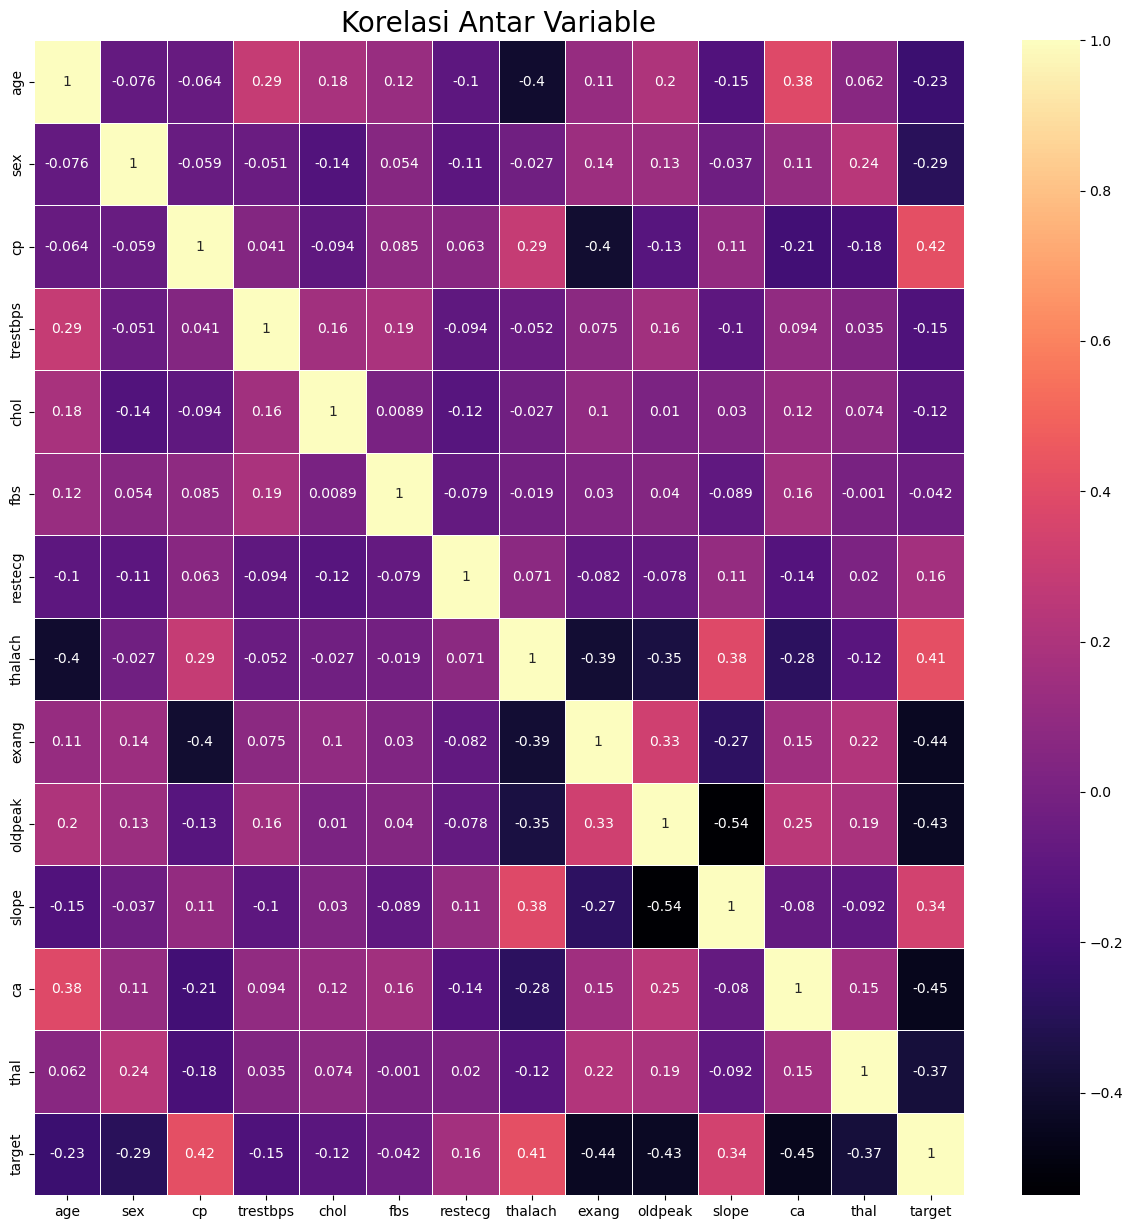

In [170]:
'''TODO: Menampilkan grafik korelasi'''
# melihat korelasi antar variable untuk mencari feature yang penting
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor,annot=True, linewidth=.4, cmap="magma")
plt.title('Korelasi Antar Variable', fontsize = 20)
plt.show()

y = 2x + 3

In [171]:
'''TODO: Menampilkan tabel korelasi'''
cor_matrix = df.corr()
cor_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.075938,-0.063675,0.287119,0.177738,0.122130,-0.103271,-0.400295,0.114798,0.202572,-0.152354,0.383960,0.061637,-0.228199
sex,-0.075938,1.000000,-0.059119,-0.050535,-0.141056,0.054131,-0.105517,-0.027112,0.137428,0.129683,-0.036620,0.111407,0.241279,-0.291647
cp,-0.063675,-0.059119,1.000000,0.040719,-0.093846,0.084620,0.062529,0.286167,-0.396393,-0.128417,0.105619,-0.205857,-0.178061,0.416037
trestbps,0.287119,-0.050535,0.040719,1.000000,0.156105,0.187043,-0.093580,-0.052180,0.074864,0.159376,-0.100984,0.093682,0.034963,-0.153099
chol,0.177738,-0.141056,-0.093846,0.156105,1.000000,0.008938,-0.124835,-0.026966,0.099518,0.010072,0.029677,0.117086,0.074469,-0.115931
fbs,0.122130,0.054131,0.084620,0.187043,0.008938,1.000000,-0.079142,-0.019162,0.030287,0.040323,-0.089389,0.158084,-0.001026,-0.042272
restecg,-0.103271,-0.105517,0.062529,-0.093580,-0.124835,-0.079142,1.000000,0.070973,-0.081675,-0.077662,0.109118,-0.135107,0.020409,0.163927
thalach,-0.400295,-0.027112,0.286167,-0.052180,-0.026966,-0.019162,0.070973,1.000000,-0.388073,-0.352555,0.382601,-0.284136,-0.118065,0.412215
exang,0.114798,0.137428,-0.396393,0.074864,0.099518,0.030287,-0.081675,-0.388073,1.000000,0.325332,-0.274695,0.150918,0.218939,-0.437542
oldpeak,0.202572,0.129683,-0.128417,0.159376,0.010072,0.040323,-0.077662,-0.352555,0.325332,1.000000,-0.536645,0.247428,0.189153,-0.434354


In [210]:
# Mengurutkan korelasi
sorted_correlation = cor_matrix['target'].sort_values(ascending=False)
sorted_correlation

target      1.000000
cp          0.416037
thalach     0.412215
slope       0.337719
restecg     0.163927
fbs        -0.042272
chol       -0.115931
trestbps   -0.153099
age        -0.228199
sex        -0.291647
thal       -0.371944
oldpeak    -0.434354
exang      -0.437542
ca         -0.453517
Name: target, dtype: float64

<Axes: >

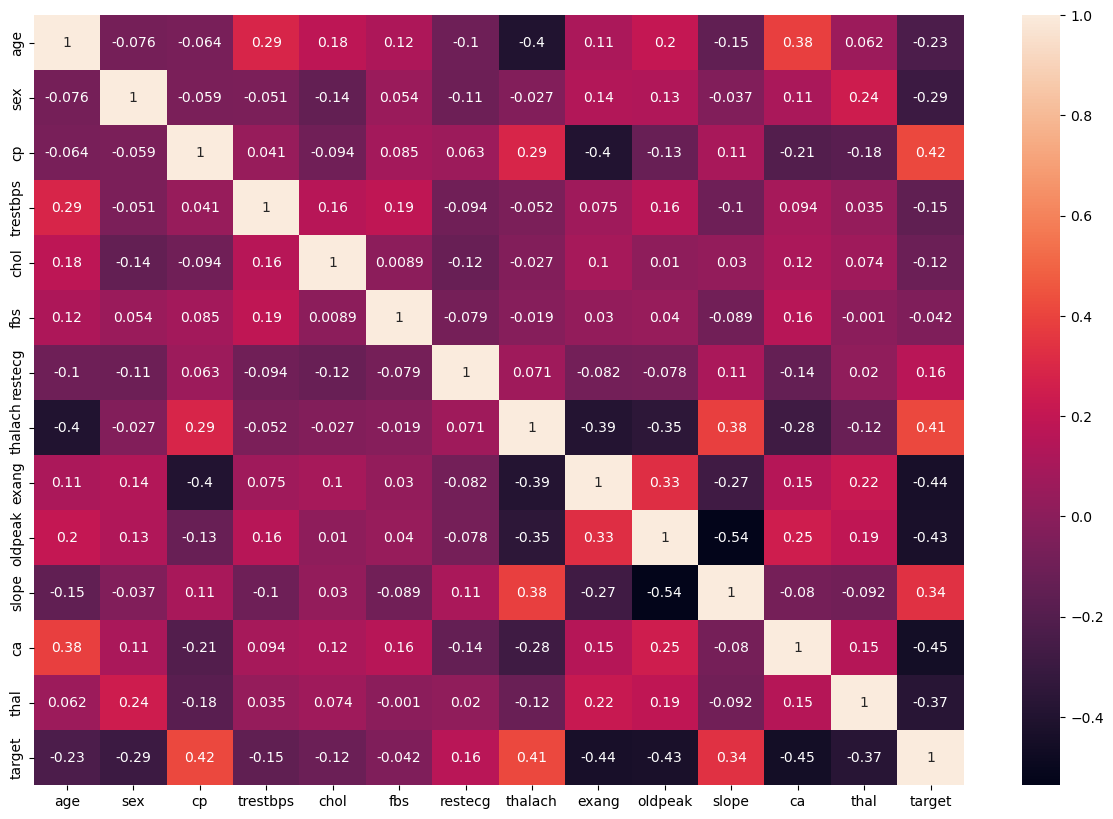

In [173]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

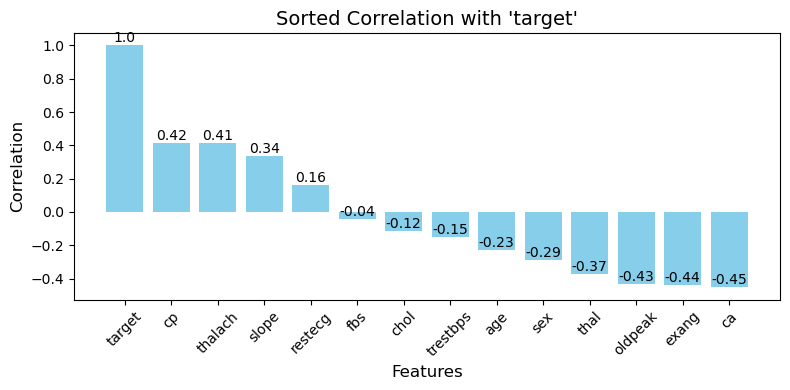

In [212]:
plt.figure(figsize=(8, 4))  # Set the figure size
plt.bar(sorted_correlation.index, sorted_correlation, color='skyblue')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Correlation", fontsize=12)
plt.title("Sorted Correlation with 'target'", fontsize=14)

# Add text labels to the bars
for i, val in enumerate(sorted_correlation):
    plt.text(i, val, round(val, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, fontsize=10)  # Rotate and set fontsize for x-axis labels
plt.tight_layout()
plt.show()

Korelasi target(penyakit jantung) dengan variabel lainnya. Korelasi positif dengan variabel tertentu berarti semakin tinggi variabel tersebut maka akan semakin tinggi juga kemungkinan terkena penyakit jantung, sedangkan korelasi negatif ialah semakin rendah nilai variabel tersebut maka kemungkinan terkena penyakit jantung lebih tinggi.

1. ca -0.456989 (Korelasi Negatif Kuat)
2. oldpeak -0.434108 (Korelasi Negatif Kuat)
3. exang -0.431599 (Korelasi Negatif Kuat)
4. thal -0.370759 (Korelasi Negatif Kuat)
5. sex -0.318896 (Korelasi Negatif Kuat)
6. age -0.222416 (Korelasi Negatif)
7. trestbps -0.115614 (Korelasi Negatif Lemah)
8. chol -0.0105627 (Korelasi Negatif Lemah)
9. fbs 0.027210 (Korelasi Positif Lemah)
10. restecg 0.171453 (Korelasi Positif Lemah)
11. slope 0.326473 (korelasi Positif Kuat)
12. cp 0.422559 (korelasi Positif Kuat)
13. thalach 0.432211 (korelasi Positif Kuat)

Jadi, bisa disimpulkan faktor yang paling berpengaruh terhadap penyakit jantung ialah, sebagai berikut:

1. ca (semakin banyak major vessels ,maka akan semakin tinggi resiko terkena penyakit jantung)
2. oldpeak (Semakin rendah depresi ST yang disebabkan oleh latihan relatif terhadap istirahat, maka resiko terkena penyakit jantung akan semakin tinggi)
3. exang (Apibila exercise induced angina rendah, maka resiko terkena penyakit jantung akan semakin tinggi)
4. thal(semakin rendah tipe jenis defek jantung, maka resiko terkena penyakit jantung semakin tinggi)
5. sex (Perempuan memiliki resiko terkena penyakit jantung lebih tinggi dibandingkan laki-laki)
6. age (semakin muda umur, ternyata semakin tinggi terkena penyakit jantung)
7. slope (Semakin tinggi kemiringan segmen latihan ST maka, resiko terkena penyakit jantung semakin tinggi)
8. cp (Semakin tinggi tipe Jenis rasa sakit pada dada, maka resiko terkena penyakit jantung semakin tinggi)
9. thalach (semakin tinggi detak jantung maksimum yang dicapai pasien selama tes latihan, maka resiko terkena penyakit jantung semakin tinggi)

Kesimpulan.

1. 'cp', 'thalach', dan 'slope' berkorelasi positif cukup kuat dengan 'target'.
2. 'oldpeak', 'exang', 'ca', 'thal', 'sex', dan 'age' berkorelasi cukup kuat dengan 'target'.
3. 'fbs', 'chol', 'trestbps', dan 'restecg' memiliki korelasi yang lemah dengan 'target'.

Feature yang dipilih yaitu :'cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex', dan 'age' untuk dianalisa lebih lanjut.

In [174]:
'''TODO: Memasukkan 9 variabel terpilih diatas'''
variabel = ['cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex', 'age']
analyze = df[variabel]

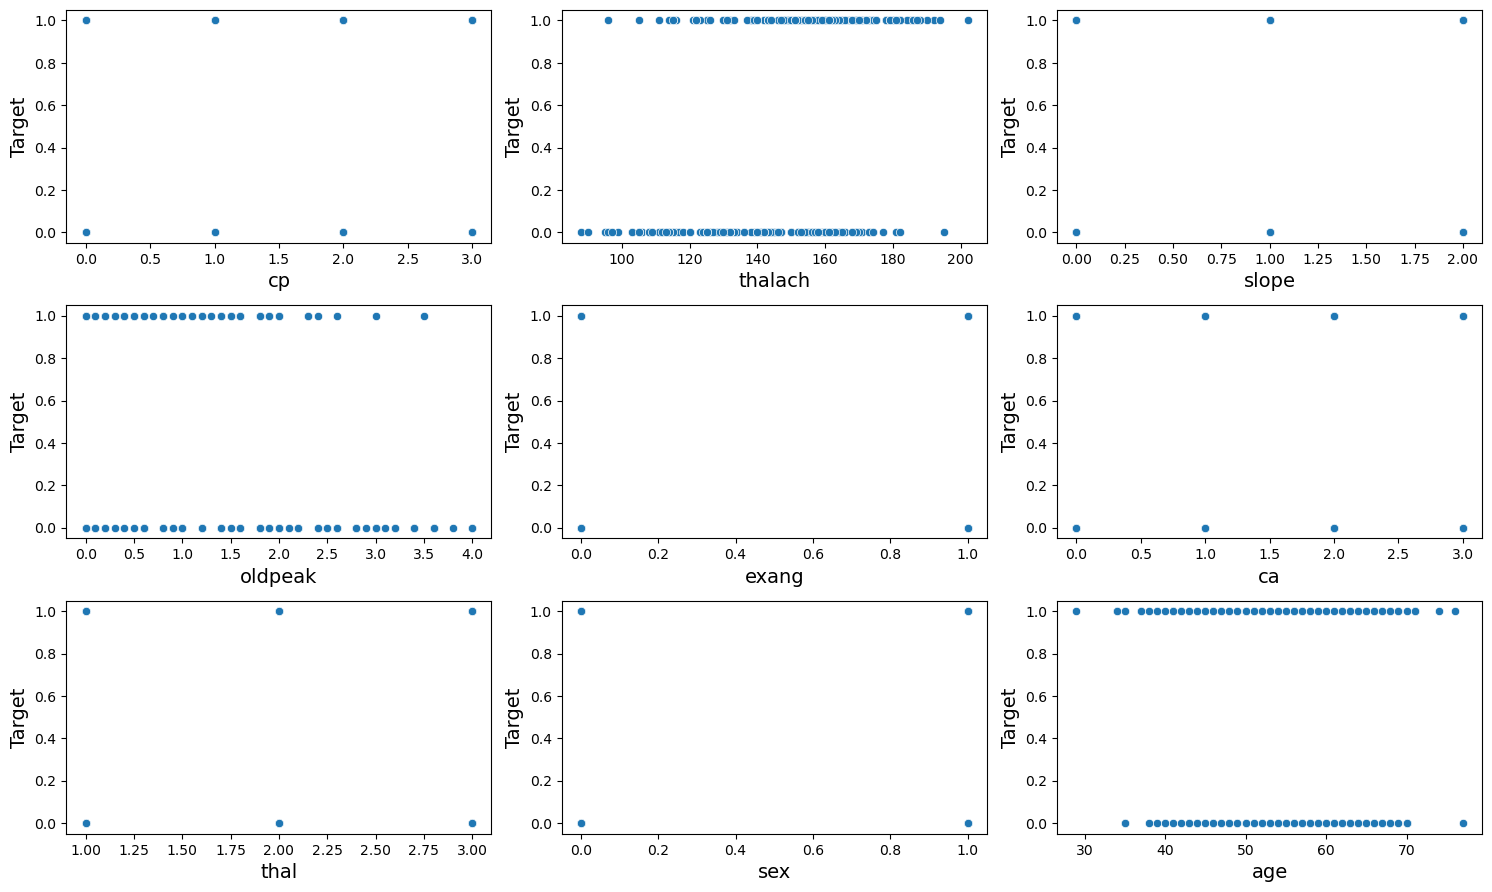

In [175]:
# Informasi variabel ke target
fig = plt.figure(figsize=(15,9))
for index in range(len(analyze.columns)):
    plt.subplot(3,3,index + 1)
    sns.scatterplot(x = analyze.iloc[:,index],y=df.target,data = analyze)
    plt.xlabel(analyze.columns[index], fontsize=14)
    plt.ylabel("Target", fontsize=14)

fig.tight_layout(pad = 1.0)

**Scaling data**

Scaling adalah suatu cara untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama. Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya.

In [176]:
# Mendefinisikan standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop("target", axis=1))

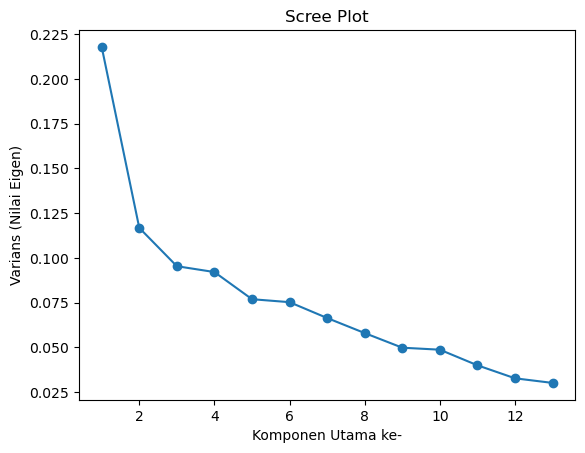

In [177]:
# Perform PCA for dimensionality reduction
feature_number = len(X_scaled[0])
pca = PCA(n_components=feature_number)

# Fit PCA with dataset
pca.fit(X_scaled)

# Get variance information
variance_ratio = pca.explained_variance_ratio_

# Calculate cummulative
cumulative_variance = np.cumsum(variance_ratio)

# Create Scree Plot
plt.plot(range(1, len(variance_ratio) + 1), variance_ratio, marker='o')
plt.xlabel('Komponen Utama ke-')
plt.ylabel('Varians (Nilai Eigen)')
plt.title('Scree Plot')
plt.show()

In [178]:
pca = PCA(n_components=9)
heart_data_reduced = pca.fit_transform(X_scaled)

In [179]:
feature_names = df.drop('target', axis=1).columns.to_list()
component_names = [f"PC{i+1}" for i in range(pca.n_components_)]

for component, component_name in zip(pca.components_, component_names):
    feature_indices = component.argsort()[::-1]
    retained_features = [feature_names[idx] for idx in feature_indices[:pca.n_components_]]
    print(f"{component_name}: {retained_features}")

PC1: ['oldpeak', 'exang', 'ca', 'age', 'thal', 'trestbps', 'chol', 'sex', 'fbs']
PC2: ['sex', 'thal', 'exang', 'restecg', 'oldpeak', 'thalach', 'slope', 'ca', 'cp']
PC3: ['cp', 'oldpeak', 'fbs', 'sex', 'trestbps', 'thalach', 'restecg', 'age', 'thal']
PC4: ['restecg', 'oldpeak', 'age', 'exang', 'chol', 'cp', 'trestbps', 'ca', 'thalach']
PC5: ['restecg', 'ca', 'age', 'slope', 'thal', 'fbs', 'cp', 'sex', 'oldpeak']
PC6: ['thal', 'restecg', 'trestbps', 'chol', 'thalach', 'oldpeak', 'cp', 'exang', 'fbs']
PC7: ['fbs', 'exang', 'restecg', 'trestbps', 'slope', 'thalach', 'chol', 'ca', 'sex']
PC8: ['trestbps', 'slope', 'sex', 'age', 'exang', 'restecg', 'thalach', 'oldpeak', 'thal']
PC9: ['thal', 'age', 'cp', 'fbs', 'exang', 'slope', 'sex', 'chol', 'trestbps']


# Pendahuluan

Di dalam material ini, kamu akan mempelajari Data Heart Disease dan belajar bagaimana melakukan pemodelan. Lakukan kode dan jalankan setiap sel. Selama proses pembelajaran, kamu akan menemui beberapa blok **TODO** -- ikuti petunjuk untuk mengisinya sebelum menjalankan sel-sel tersebut dan melanjutkan.

In [180]:
# Memuat dataset yang sudah rapi ditahapan sebelumnya
data = "data.csv"
df = pd.read_csv(data, index_col=0)
df['sex'] = df['sex'].replace({'Male' : 1,'Female': 0})
df['cp'] = df['cp'].replace({'typical angina' : 0, 'atypical angina' : 1, 'non-anginal pain' : 2, 'asymtomatic' : 3})
df['fbs'] = df['fbs'].replace({'No' : 0, 'Yes' : 1})
df['restecg'] = df['restecg'].replace({'probable or definite left ventricular hypertrophy':0,'normal':1,'ST-T Wave abnormal':2})
df['exang'] = df['exang'].replace({'No':0,'Yes':1})
df['slope'] = df['slope'].replace({'downsloping':0, 'flat':1,'upsloping':2})
df['thal'] = df['thal'].replace({'normal':1, 'fixed defect':2,'reversable defect':3})
df['ca'] = df['ca'].replace({'Number of major vessels: 0':0, 'Number of major vessels: 1':1,'Number of major vessels: 2':2, 'Number of major vessels: 3':3})
df['target'] = df['target'].replace({'No disease':0,'Disease':1})

'''TODO: Ambil variabel terpilih'''
# Variabel terpilih
df = df[['sex','cp','fbs','restecg','exang','slope','thal','ca','target']]

In [181]:
'''TODO: Buatlah pengalian informasi dari data teratas dan liat kolomsnya'''
# Liat informasi dari dataset yang kita miliki
print(df.head())
print(df.columns)

   sex  cp  fbs  restecg  exang  slope  thal  ca  target
0    1   0    0        1      0      2     3   2       0
1    1   0    1        0      1      0     3   0       0
2    1   0    0        1      1      0     3   0       0
3    1   0    0        1      0      2     3   1       0
4    0   0    1        1      0      1     2   3       0
Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca',
       'target'],
      dtype='object')


**Memisahkan variabel dependen dan independen**

Variabel dependen yang digunakan adalah data pada kolom 'target', kolom feature merupakan variabel independen. Disini kamu akan membuat variabel X menggunakan .isin() untuk semua kolom kecuali kolom target, kemudian variabel y yang hanya kolom target saja.

In [182]:
'''TODO: Pisahkan variabel X dan y'''
# Define X and y
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']]
y = df['target']

In [183]:
# Melihat kolom yang termasuk variable indepnden
X.head()

,sex,cp,fbs,restecg,exang,slope,thal,ca
0,1,0,0,1,0,2,3,2
1,1,0,1,0,1,0,3,0
2,1,0,0,1,1,0,3,0
3,1,0,0,1,0,2,3,1
4,0,0,1,1,0,1,2,3


In [184]:
# Melihat variabel dependen
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [185]:
'''TODO: Buatlah scaling data'''
# Mendefinisikan standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Spliting data**

Pisahkan dataset menjadi training dan testing dataset dengan perbandingan 80:20 dan random state 42!

In [186]:
'''TODO: Pisahkan data menjadi beberapa klasifikasi train dan testing'''
# Mendefinisikan pemisahan data
X_train, X_test, y_train, y_test = train_test_split(X_scaled , y, test_size=0.2, random_state=42)

# Menampilkan hasil pemisahan berdasarkan kolom dan baris
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(232, 8)
(59, 8)
(232,)
(59,)


**Pemodelan dengan Heart Disease Dataset**

Kita akan melakukan pemodelan untuk 4 model berbeda diantaranya logistic regression, decision tree, random forest dan neural networks.

In [187]:
# Menyiapkan libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [188]:
'''TODO: Buatlah pengalian informasi Logistik Regresi dan hitung akurasinya'''
clf = LogisticRegression()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Logistric Regression Classifier is ", accuracy_score(y_test,y_pred))

The test accuracy score of Logistric Regression Classifier is  0.7966101694915254


In [189]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.59      0.73        27
           1       0.74      0.97      0.84        32

    accuracy                           0.80        59
   macro avg       0.84      0.78      0.78        59
weighted avg       0.83      0.80      0.79        59



In [190]:
'''TODO: Buatlah pengalian informasi Decision Tree dan hitung akurasinya'''
clf = DecisionTreeClassifier()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Decision Tree Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree Classifier is  0.7288135593220338


In [191]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69        27
           1       0.74      0.78      0.76        32

    accuracy                           0.73        59
   macro avg       0.73      0.72      0.72        59
weighted avg       0.73      0.73      0.73        59



In [192]:
'''TODO: Buatlah pengalian informasi Random Forest dan hitung akurasinya'''
clf = RandomForestClassifier()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Random Forest Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest Classifier is  0.7627118644067796


In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.63      0.71        27
           1       0.74      0.88      0.80        32

    accuracy                           0.76        59
   macro avg       0.77      0.75      0.75        59
weighted avg       0.77      0.76      0.76        59



In [194]:
'''TODO: Buatlah pengalian informasi MLP dan hitung akurasinya'''
clf = MLPClassifier()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of MLP Classifier is ", accuracy_score(y_test,y_pred))

The test accuracy score of MLP Classifier is  0.7966101694915254


In [195]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.59      0.73        27
           1       0.74      0.97      0.84        32

    accuracy                           0.80        59
   macro avg       0.84      0.78      0.78        59
weighted avg       0.83      0.80      0.79        59



**Membandingkan hasil diatas**

Berdasarkan hasil ke-4 model (Random Forest, Logistic Regression, Decision Tree dan Multi-layer Perceptron). Berikut didapatkan akurasi pada proses kali ini:
- Pada model Decision Tree memiliki nilai akurasi terkecil sebesar 70% dengan recall sebesar 81%.
- Random Forest memiliki nilai akurasi terbesar sebesar 84% dengan recall 84%.

**Pojok Catatan**

Recall: Kemampuan model untuk menemukan semua kasus relevan dimana kebanyakan penting untuk deteksi risiko tinggi (seperti deteksi kanker), recall adalah metrik evaluasi yang lebih penting daripada presisi.

Dalam kasus prediksi gagal jantung, kita ingin menghindari false negatives sebanyak mungkin. Kasus false negative berarti masalah gagal jantung tidak terdeteksi, yang bisa sangat berbahaya. Dalam kasus penggunaan ini, false positives (seseorang yang sehat dengan diagnosis masalah jantung tidak sehat) tidak sepenting mencegah situasi ketika kita tidak mendeteksi masalah serius.

**Proses Hyperparameter Tuning**

In [196]:
'''TODO: Buatlah hyperparameter Logistik Regresi dan hitung akurasinya'''
# Logistic regression classifier with hyperparameter
clf = LogisticRegression()

param_grid = {
    'max_iter': [100, 200, 300],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

gs1 = GridSearchCV(
        estimator= clf,
        param_grid = param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_clf_lg = gs1.fit(X_train, y_train)

print(fit_clf_lg.best_params_)
print(fit_clf_lg.best_score_)

{'max_iter': 100, 'multi_class': 'auto', 'solver': 'liblinear'}
0.9187673992673993


In [197]:
y_pred = fit_clf_lg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.59      0.73        27
           1       0.74      0.97      0.84        32

    accuracy                           0.80        59
   macro avg       0.84      0.78      0.78        59
weighted avg       0.83      0.80      0.79        59



Setelah dilakukan hyperparameter tuning model logistic regression terjadi peningkatan pada nilai akurasi walaupun tidak begitu signifikan. Nilai akurasi naik dari yang awalnya 81% menjadi 84%.

In [198]:
'''TODO: Buatlah hyperparameter Random Forest dan hitung akurasinya'''
# Random Forest classifier with hyperparameter
clf = RandomForestClassifier()

param_grid = {'n_estimators': [100, 200, 300],
               'max_depth': [None, 10, 20, 30, 40],
               'criterion': ['gini', 'entropy']}

gs1 = GridSearchCV(
        estimator=clf,
        param_grid = param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_clf_rf = gs1.fit(X_train, y_train)

print(fit_clf_rf.best_params_)
print(fit_clf_rf.best_score_)

{'criterion': 'gini', 'max_depth': 40, 'n_estimators': 200}
0.9356062271062271


In [199]:
y_pred = fit_clf_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.63      0.72        27
           1       0.74      0.91      0.82        32

    accuracy                           0.78        59
   macro avg       0.80      0.77      0.77        59
weighted avg       0.79      0.78      0.77        59



Setelah dilakukan model random forest dilakukan hyperparameter tuning akurasi model menurun menjadi 82% dari yang awalnya 84%. Turunnya akurasi tersebut bukan menunjukkan hyperparameter tuning yang kita lakukan gagal, melainkan hyperparameter tuning yang kita lakukan berhasil karena dengan begitu model menjadi sedikit lebih general atau tidak overfitting.

In [200]:
'''TODO: Buatlah hyperparameter Decision Tree dan hitung akurasinya'''
# Decision Tree classifier with hyperparameter
clf = DecisionTreeClassifier()

param_grid = {'min_samples_leaf': [1,2,4],
               'max_depth': [None, '10', '20', '30'],
               'criterion': ['gini', 'entropy']}

gs1 = GridSearchCV(
        estimator=clf,
        param_grid = param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_clf_dt = gs1.fit(X_train, y_train)

print(fit_clf_dt.best_params_)
print(fit_clf_dt.best_score_)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4}
0.9054358974358975


In [201]:
y_pred = fit_clf_dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        27
           1       0.78      0.78      0.78        32

    accuracy                           0.76        59
   macro avg       0.76      0.76      0.76        59
weighted avg       0.76      0.76      0.76        59



Setelah dilakukan hyperparameter tuning model decision tree terjadi peningkatan pada nilai akurasi walaupun tidak begitu signifikan. Nilai akurasi naik dari yang awalnya 70% menjadi 77%.

In [202]:
'''TODO: Buatlah hyperparameter MLP dan hitung akurasinya'''
# MLP Classifier with hyperparameter
clf = MLPClassifier()

param_grid1 = {'hidden_layer_sizes': [(100,),(100,50),(100, 100, 100)],
               'activation': ['logistic', 'tanh', 'relu'],
               'solver': ['sgd', 'adam' ]}

gs1 = GridSearchCV(
        estimator=clf,
        param_grid = param_grid1,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_clf_mlp = gs1.fit(X_train, y_train)

print(fit_clf_mlp.best_params_)
print(fit_clf_mlp.best_score_)

{'activation': 'tanh', 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}
0.9276978021978023


In [203]:
y_pred = fit_clf_mlp.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.56      0.68        27
           1       0.71      0.94      0.81        32

    accuracy                           0.76        59
   macro avg       0.80      0.75      0.75        59
weighted avg       0.79      0.76      0.75        59



Setelah dilakukan model random forest dilakukan hyperparameter tuning akurasi model menurun menjadi 81% dari yang awalnya 82%. Turunnya akurasi tersebut bukan menunjukkan hyperparameter tuning yang kita lakukan gagal, melainkan hyperparameter tuning yang kita lakukan berhasil karena dengan begitu model menjadi sedikit lebih general atau tidak overfitting.

**ROC Analysis**

Kurva yang menyajikan ilustrasi performansi dari binary classifier system dalam menghasilkan sebuah prediksi

In [204]:
'''TODO: Silahkan buat ROC Analysis dari masing-masing model'''
# Predict the probabilities for the positive class
y_pred_logreg = fit_clf_lg.predict_proba(X_test)[:,1]
y_pred_rf = fit_clf_rf.predict_proba(X_test)[:,1]
y_pred_dt= fit_clf_dt.predict_proba(X_test)[:,1]
y_pred_mlp= fit_clf_mlp.predict_proba(X_test)[:,1]

# Calculate the AUC-ROC scores
auc_logreg = roc_auc_score(y_test, y_pred_logreg)
auc_rf = roc_auc_score(y_test, y_pred_rf)
auc_dt = roc_auc_score(y_test, y_pred_dt)
auc_mlp = roc_auc_score(y_test, y_pred_mlp)

print(f"AUC-ROC for Logistic Regression: {auc_logreg}")
print(f"AUC-ROC for Random Forest: {auc_rf}")
print(f"AUC-ROC for Decision Tree: {auc_dt}")
print(f"AUC-ROC for MLP: {auc_mlp}")

AUC-ROC for Logistic Regression: 0.8449074074074073
AUC-ROC for Random Forest: 0.8298611111111112
AUC-ROC for Decision Tree: 0.7945601851851852
AUC-ROC for MLP: 0.8356481481481481


Jika dilihat dari nilai AUC-ROC, model Random Forest memiliki nilai yang paling tinggi. Akan tetapi perbedaan nilai AUC-ROC Random Forest dengan 1 model lainnya tidak terpaut jauh dengan logistic regression.

ROC adalah kurva probabilitas dan AUC mewakili tingkat atau ukuran pemisahan. Ini menunjukkan seberapa baik model mampu membedakan antara kelas. Semakin tinggi AUC, semakin baik modelnya dalam memprediksi kelas 0 sebagai 0 dan kelas 1 sebagai 1.

Kurva ROC digambarkan dengan TPR (True Positive Rate) melawan FPR (False Positive Rate) di mana TPR berada di sumbu y dan FPR berada di sumbu x.

Model yang sangat baik memiliki AUC mendekati 1, yang berarti memiliki ukuran pemisahan yang baik. Model yang buruk memiliki AUC mendekati 0, yang berarti memiliki ukuran pemisahan yang terburuk.

Ketika AUC adalah 0.7, artinya ada peluang sebesar 70% bahwa model akan mampu membedakan antara kelas positif dan kelas negatif. Ketika AUC mendekati 0.5, model tidak memiliki kemampuan diskriminasi untuk membedakan antara kelas positif dan kelas negatif. Ketika AUC mendekati 0, model memprediksi kelas negatif sebagai kelas positif dan sebaliknya.

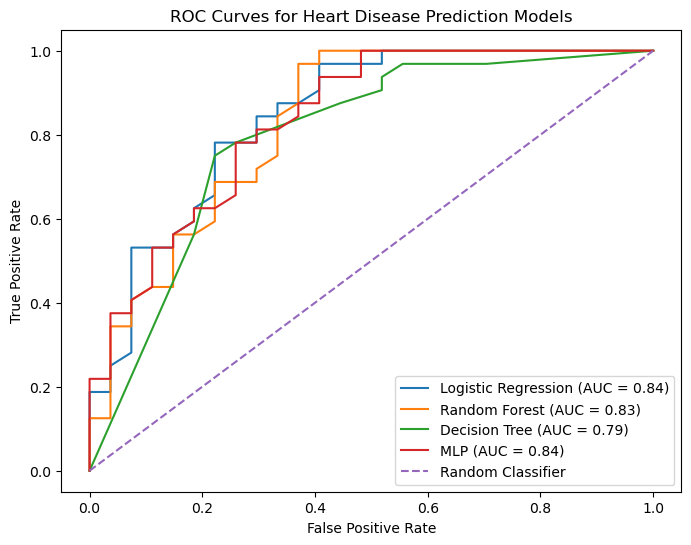

In [205]:
'''TODO: Silahkan buat ROC Analysis Graph'''
#Membuat ROC Analisis
def plot_roc_curves(y_test, y_pred_logreg, y_pred_rf, y_pred_dt, y_pred_mlp):
    plt.figure(figsize=(8, 6))

    # Calculate ROC curves for each model
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
    fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)

    # Plot ROC curves
    plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
    plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
    plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')

    # Plot random classifier
    plt.plot([0,1],[0,1], linestyle='--', label='Random Classifier')

    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Heart Disease Prediction Models')
    plt.legend()
    plt.show()

plot_roc_curves(y_test, y_pred_logreg, y_pred_rf, y_pred_dt, y_pred_mlp)

In [206]:
'''TODO: Silahkan buat ROC Analysis Graph untuk menentukan treshold'''
def find_rates_for_thresholds(y_pred, y_test, thresholds):
    fpr_list = []
    tpr_list = []
    for threshold in thresholds:
        y_pred_binary = (y_pred > threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
        fpr = fp / (fp + tn)
        tpr = tp / (tp + fn)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
    return fpr_list, tpr_list

thresholds = np.arange(0, 1.1, 0.1)

fpr_logreg, tpr_logreg = find_rates_for_thresholds(y_pred_logreg, y_test, thresholds)
fpr_rf, tpr_rf = find_rates_for_thresholds(y_pred_rf, y_test, thresholds)
fpr_dt, tpr_dt = find_rates_for_thresholds(y_pred_dt, y_test, thresholds)
fpr_mlp, tpr_mlp = find_rates_for_thresholds(y_pred_mlp,y_test, thresholds)

'''TODO: Silahkan buat Summary DataFrame'''
summary_df = pd.DataFrame({
    'Threshold' : thresholds,
    'Logistic Regression FPR' : fpr_logreg,
    'Logistic Regression TPR' : tpr_logreg,
    'Random Forest FPR' : fpr_rf,
    'Random Forest TPR' : tpr_rf,
    'Decision Tree FPR' : fpr_dt,
    'Decision Tree TPR' : tpr_dt,
    'MLP FPR' : fpr_mlp,
    'MLP TPR' : tpr_mlp

})

print(summary_df)

    Threshold  Logistic Regression FPR  Logistic Regression TPR  \
0         0.0                 1.000000                  1.00000   
1         0.1                 0.703704                  1.00000   
2         0.2                 0.592593                  1.00000   
3         0.3                 0.555556                  1.00000   
4         0.4                 0.481481                  0.96875   
5         0.5                 0.407407                  0.96875   
6         0.6                 0.407407                  0.90625   
7         0.7                 0.296296                  0.84375   
8         0.8                 0.222222                  0.65625   
9         0.9                 0.074074                  0.46875   
10        1.0                 0.000000                  0.00000   

    Random Forest FPR  Random Forest TPR  Decision Tree FPR  \
0            0.962963            1.00000           0.703704   
1            0.629630            1.00000           0.592593   
2     

In [207]:
summary_df

,Threshold,Logistic Regression FPR,Logistic Regression TPR,Random Forest FPR,Random Forest TPR,Decision Tree FPR,Decision Tree TPR,MLP FPR,MLP TPR
0,0.0,1.000000,1.00000,0.962963,1.00000,0.703704,0.96875,1.000000,1.0000
1,0.1,0.703704,1.00000,0.629630,1.00000,0.592593,0.96875,0.629630,1.0000
2,0.2,0.592593,1.00000,0.555556,1.00000,0.555556,0.96875,0.481481,1.0000
3,0.3,0.555556,1.00000,0.444444,1.00000,0.555556,0.96875,0.481481,1.0000
4,0.4,0.481481,0.96875,0.370370,0.96875,0.518519,0.90625,0.481481,0.9375
5,0.5,0.407407,0.96875,0.370370,0.90625,0.259259,0.78125,0.444444,0.9375
6,0.6,0.407407,0.90625,0.333333,0.81250,0.259259,0.78125,0.407407,0.8750
7,0.7,0.296296,0.84375,0.333333,0.78125,0.259259,0.78125,0.333333,0.8125
8,0.8,0.222222,0.65625,0.296296,0.71875,0.259259,0.78125,0.222222,0.6250
9,0.9,0.074074,0.46875,0.185185,0.56250,0.185185,0.56250,0.148148,0.5625


In [208]:
'''TODO: Silahkan buat ROC Analysis Graph untuk menentukan best treshold'''
def find_best_threshold(y_test, y_pred):
    # based on Youden's Index
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    #calculate Youden's Index
    youden_index = tpr - fpr

    #ambil indeks tresholds terbaik
    optimal_idx = np.argmax(youden_index)
    return thresholds[optimal_idx]

best_threshold_logreg = find_best_threshold(y_test, y_pred_logreg)
best_threshold_rf = find_best_threshold(y_test, y_pred_rf)
best_threshold_dt = find_best_threshold(y_test, y_pred_dt)
best_threshold_mlp = find_best_threshold(y_test, y_pred_mlp)

print(f"Best threshold for Logistic Regression: {best_threshold_logreg}")
print(f"Best threshold for Random Forest: {best_threshold_rf}")
print(f"Best threshold for Decision Tree: {best_threshold_dt}")
print(f"Best threshold for MLP: {best_threshold_mlp}")

Best threshold for Logistic Regression: 0.5337612084928925
Best threshold for Random Forest: 0.4236666666666667
Best threshold for Decision Tree: 0.8571428571428571
Best threshold for MLP: 0.5338988183988643


**Ingat**

1. Jika kita menginginkan model yang memiliki sensitivitas yang tinggi, yaitu kemampuan untuk mendeteksi sebanyak mungkin kasus positif (True Positive), maka lebih baik menggunakan treshold yang lebih rendah. Namun, ini mungkin juga akan menyebabkan peningkatan False Positive Rate (kasus negatif yang salah diprediksi positif).
2. Sebaliknya, jika kita ingin mengurangi kesalahan dalam memprediksi kasus negatif sebagai positif (False Positive), maka kita akan memilih treshold yang lebih tinggi. Namun, ini dapat mengurangi sensitivitas model (menyebabkan lebih banyak True Negative yang salah diprediksi negatif).

Jadi dapat disimpulkan, bahwa model yang peformanya lebih bagus ialah model Random Forest dengan ditandai dengan model Random Forest yang memiliki nilai akurasi pada classification report tertinggi, yaitu sebesar 82% dan Model Random Forest memiliki score AUC-ROC Terbesar dibandingkan 3 model lainnya, yaitu sebesar 90%, namun model ini memiliki treshold yang tinggi dimana akan meningkatkan FPR (Kasus negatif yang salah diprediksi positif).

In [209]:
'''TODO: Silahkan simpan model yang kamu miliki'''
import pickle
# Menyimpan model terbaik dengan pickle
pklname = 'generate_heart_disease.pkl'

with open(pklname, 'wb') as file:
    pickle.dump(fit_clf_mlp,file)

Copyright © DQlab Academy x Abel Kristanto

Copyright © DQlab Academy x Abel Kristanto